# Big Data Analytic

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!pip install findspark

In [3]:
import findspark
findspark.init("C:\spark")

In [4]:
import pyspark
from pyspark import SparkContext

#  Spark Bağlantısı 

In [40]:
from pyspark import SparkContext
sc = SparkContext(master = "local")
sc

<SparkContext master=local appName=pyspark-shell>

In [41]:
sc.version

'3.3.0'

In [42]:
sc.sparkUser()

'Mustafa'

In [43]:
sc.appName

'pyspark-shell'

In [44]:
dir(sc)

['PACKAGE_EXTENSIONS',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulatorServer',
 '_active_spark_context',
 '_assert_on_driver',
 '_batchSize',
 '_callsite',
 '_checkpointFile',
 '_conf',
 '_dictToJavaMap',
 '_do_init',
 '_encryption_enabled',
 '_ensure_initialized',
 '_gateway',
 '_getJavaStorageLevel',
 '_initialize_context',
 '_javaAccumulator',
 '_jsc',
 '_jvm',
 '_lock',
 '_next_accum_id',
 '_pickled_broadcast_vars',
 '_python_includes',
 '_repr_html_',
 '_serialize_to_jvm',
 '_temp_dir',
 '_unbatched_serializer',
 'accumulator',
 'addArchive',
 'addFile',
 'addPyFile',
 'appName',
 'app

In [38]:
sc.stop()

In [5]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext



In [6]:
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "16gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

# Temel DataFrame İşlemleri

In [7]:
spark_df = spark.read.csv("diabetes.csv", header = True, inferSchema = True)

In [8]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [9]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [10]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [11]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [12]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64","int64"])

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [15]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [16]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [17]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [18]:
df.ndim

2

In [19]:
spark_df.size

AttributeError: 'DataFrame' object has no attribute 'size'

In [20]:
spark_df.show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 2 rows



In [21]:
spark_df.count()

768

In [22]:
len(spark_df.columns)

9

In [23]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [ ]:
#degisken secme

In [24]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [25]:
spark_df.select("Glucose","Pregnancies").show(5)

+-------+-----------+
|Glucose|Pregnancies|
+-------+-----------+
|    148|          6|
|     85|          1|
|    183|          8|
|     89|          1|
|    137|          0|
+-------+-----------+
only showing top 5 rows



In [26]:
spark_df.select("Glucose").distinct().count()

136

In [27]:
spark_df.select("Glucose").dropDuplicates().count()

136

In [28]:
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [29]:
spark_df.dropna().show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [ ]:
#gozlem secme

In [30]:
spark_df.filter(spark_df.Age >40).count()

194

In [31]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [32]:
spark_df.groupby("Outcome").agg({"BMI": "mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [33]:
spark_df.withColumn("yeni_degisken", spark_df.BMI / 2).select("BMI","yeni_degisken").show(5)

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
+----+-------------+
only showing top 5 rows



In [35]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").show(2)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|bagimli_degisken|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|               1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|               0|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+----------------+
only showing top 2 rows



In [36]:
spark_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [37]:
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [38]:
a = spark_df.groupby("Outcome").count().toPandas()

In [39]:
a

,Outcome,count
0,1,268
1,0,500


In [40]:
a.iloc[1,1]

500

## SQL işlemleri

In [41]:
sc

<SparkContext master=local appName=pyspark_uygulama>

In [42]:
spark_df.registerTempTable("table_df")

In [44]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [45]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         | table_df|       true|
+---------+---------+-----------+



In [46]:
spark.sql("select Glucose from table_df").show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
|    116|
|     78|
|    115|
|    197|
|    125|
|    110|
|    168|
|    139|
|    189|
|    166|
|    100|
|    118|
|    107|
|    103|
|    115|
+-------+
only showing top 20 rows



In [49]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show()

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



## Big Data Visualization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.barplot(x = "Outcome" , y = spark_df.Outcome.index, data = spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

In [51]:
sdf = spark_df.toPandas()

In [52]:
sdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Outcome'>

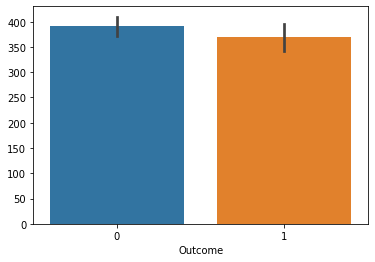

In [54]:
sns.barplot(x = "Outcome" , y = sdf.Outcome.index, data = sdf)

In [55]:
sc.stop()
